In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)
pd.set_option('display.max_columns', None)

In [1]:
data_path = "../energydata12April2022/"
data_files = [data_path+"/crac3.txt"]
#data_files = [data_path+"/crac3.txt",data_path+"/crac4.txt",data_path+"/crac1.txt", data_path+"/ulc5.txt", data_path+"/ulc6.txt", data_path+"/ndb.txt", data_path+"/adb.txt",data_path+"/iudb.txt"]

In [2]:
def time_parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')




In [3]:
import pandas as pd
data = {}
for data_file in data_files:
    data[data_file] = pd.read_csv(data_file,index_col='timeval',parse_dates=True,date_parser=time_parser)

/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_14929/202357289.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


In [4]:
f= data_files[0]

In [53]:
fields = ['ActiveThreePhasePower_W','ConsumedInductiveReactiveEnergykvarhL_kvarh']



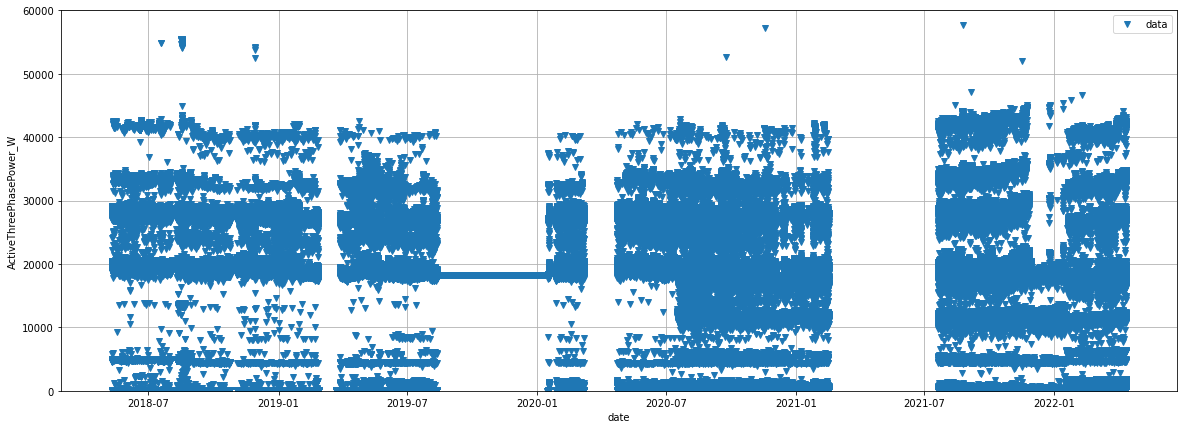

In [54]:

data_now = data[f]
target = data_now[fields[0]]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
plt.ylim(0,60000)
plt.grid("on")
plt.xlabel("date")
plt.ylabel("ActiveThreePhasePower_W")
plt.plot(data_now.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()

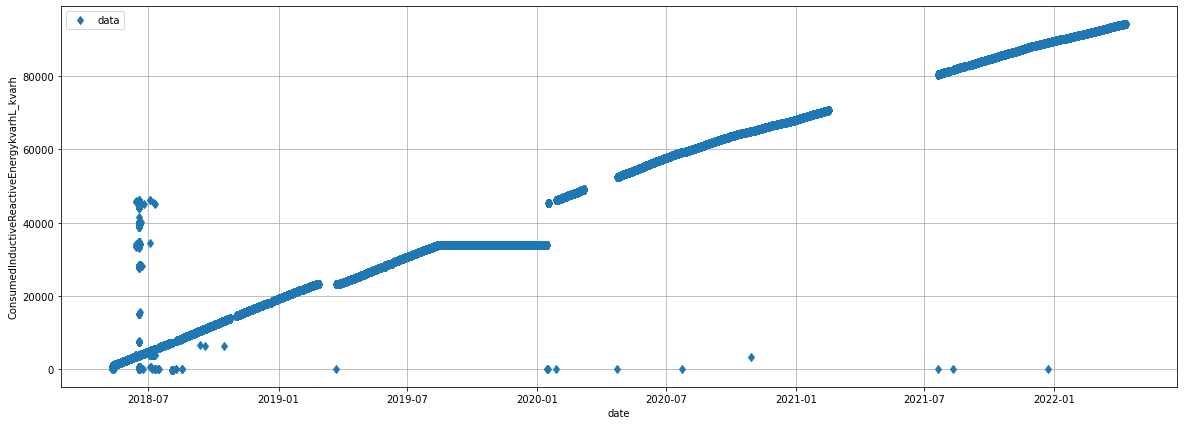

In [55]:


data_now = data[f]
target = data_now[fields[1]]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
 
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fields[1])
plt.plot(data_now.index.values,target.values ,label="data",ls='None',marker='d')
plt.legend()
plt.show()

In [10]:
data_now.head(1000)


,L1PhaseVoltage_Vx10,L1Current_mA,L1ActivePower_W,L1InductivePower_var,L1CapacitivePower_var,L1ApparentPower_VA,L1PowerFactor_x100,CosPhiL1_x100,L2PhaseVoltage_Vx10,L2Current_mA,L2ActivePower_W,L2InductivePower_var,L2CapacitivePower_var,L2ApparentPower_VA,L2PowerFactor_x100,CosPhiL2_x100,L3PhaseVoltage_Vx10,L3Current_mA,L3ActivePower_W,L3InductivePower_var,L3CapacitivePower_var,L3ApparentPower_VA,L3PowerFactor_x100,CosPhiL3_x100,ActiveThreePhasePower_W,InductiveThreePhasePower_var,CapacitiveThreePhasePower_var,ApparentThreePhasePower_VA,ThreePhasePowerFactor_x100,ThreePhaseCosPhi_x100,L1Frequency_Hzx100,L1L2Voltage_Vx10,L2L3Voltage_Vx10,L3L1Voltage_Vx10,NeutralCurrentN_mA,L1VoltageTHD_x10,L2VoltageTHD_x10,L3VoltageTHD_x10,L1CurrentTHD_x10,L2CurrentTHD_x10,L3CurrentTHD_x10,MaximumDemandkWIII_W,MaximumDemandkVAIII_VA,MaximumDemandIAVG_mA,MaximumDemandIL1_mA,MaximumDemandIL2_mA,MaximumDemandIL3_mA,ConsumedActiveEnergykW_kWh,ConsumedActiveEnergyW_Wh,ConsumedInductiveReactiveEnergykvarhL_kvarh,ConsumedInductiveReactiveEnergyvarhL_varh,ConsumedCapacitiveReactiveEnergykvarhC_kvarh,ConsumedCapacitiveReactiveEnergyvarhC_varh,ConsumedApparentEnergykVAh_kVAh,ConsumedApparentEnergyVAh_VAh,ConsumedCO2Emissions_x10
timeval,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-10 08:00:00,2272,44080.0,9640.0,2560,0,10000,96.0,96,2294,39360.0,8840.0,1680,0,9000,97.0,98,2288,38800.0,8600.0,1920,0,8840,96.0,97,27120.0,6200,0,27880.0,97.0,97.0,4996,3944.0,3970.0,3958.0,7400.0,13.0,14.0,14.0,80.0,84.0,90.0,25640.0,26440.0,39000.0,42440.0,37600.0,37000.0,21217,218,5570,457,23,412,22064,185,0
2018-07-10 07:59:00,2276,44480.0,9760.0,2560,0,10120,96.0,96,2302,39760.0,8960.0,1720,0,9120,97.0,98,2288,39120.0,8680.0,2000,0,8920,96.0,97,27440.0,6280,0,28160.0,97.0,97.0,4996,3952.0,3976.0,3964.0,7520.0,12.0,12.0,14.0,79.0,74.0,86.0,25640.0,26440.0,39040.0,42480.0,37640.0,37040.0,21216,718,5570,342,23,412,22063,672,0
2018-07-10 07:58:00,2280,44600.0,9800.0,2520,0,10160,96.0,96,2302,39840.0,8960.0,1720,0,9160,97.0,98,2292,39120.0,8720.0,1960,0,8960,97.0,97,27520.0,6240,0,28280.0,97.0,97.0,5002,3954.0,3984.0,3969.0,7560.0,12.0,11.0,11.0,76.0,79.0,79.0,25640.0,26400.0,39040.0,42520.0,37640.0,37040.0,21216,309,5570,251,23,412,22063,253,0
2018-07-10 07:57:00,2265,44440.0,9720.0,2480,0,10040,96.0,96,2287,39840.0,8920.0,1680,0,9080,97.0,98,2274,39080.0,8640.0,1920,0,8880,97.0,97,27280.0,6120,0,28000.0,97.0,97.0,4995,3926.0,3958.0,3941.0,7520.0,13.0,13.0,13.0,74.0,87.0,80.0,25640.0,26400.0,39040.0,42520.0,37640.0,37040.0,21215,851,5570,147,23,412,22062,782,0
2018-07-10 07:56:00,2257,44000.0,9560.0,2480,0,9920,96.0,96,2279,39440.0,8800.0,1600,0,8960,97.0,98,2273,38960.0,8600.0,1880,0,8840,97.0,97,27120.0,6000,0,27840.0,97.0,97.0,5002,3917.0,2270.0,39080.0,8640.0,1880.0,0.0,8840.0,97.0,97.0,27080.0,6040.0,0.0,27800.0,97.0,97.0,5001.0,3919,3946,3928,7440,14,12,13,78,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-09 17:09:00,2248,800.0,160.0,0,0,160,88.0,100,2268,400.0,0.0,0,0,80,0.0,0,2253,400.0,0.0,0,0,80,0.0,0,160.0,0,0,320.0,50.0,100.0,5001,3896.0,3921.0,3906.0,1160.0,15.0,14.0,12.0,0.0,0.0,0.0,120.0,160.0,280.0,760.0,0.0,120.0,21069,638,5536,194,23,299,21912,76,0
2018-07-09 17:08:00,2252,760.0,160.0,0,0,160,93.0,100,2273,0.0,0.0,0,0,0,100.0,100,2262,0.0,0.0,0,0,0,100.0,100,160.0,0,0,160.0,100.0,100.0,5007,3905.0,3930.0,3921.0,1360.0,16.0,14.0,15.0,0.0,0.0,0.0,120.0,160.0,280.0,760.0,0.0,120.0,21069,635,5536,194,23,299,21912,73,0
2018-07-09 17:07:00,2250,800.0,160.0,0,0,160,88.0,100,2271,0.0,0.0,0,0,0,100.0,100,2260,0.0,0.0,0,0,0,100.0,100,160.0,0,0,160.0,100.0,100.0,5003,3900.0,3928.0,3916.0,1160.0,15.0,14.0,13.0,0.0,0.0,0.0,120.0,160.0,280.0,760.0,40.0,120.0,21069,633,5536,194,23,298,21912,69,0


# remove anomaly row

In [56]:
#from datetime import datetime

csv_file =  f
i = 0
prev_val = -1 
k = 0 
   
max_val = [60000,500000]

min_val = [1,1]
increase = [False, False]
 
outfile = f.split('/')[-1].split('.')[0]+'_out.csv'
 
header = data_now.index.name+','+','.join(data_now.columns)+'\n'

out_csv = open(outfile,'w')
out_csv.write(header)

prev_val = [-1 ] * len(fields)

for index,row in data_now.iterrows():
     
    found = False

    y = 0
    error = False
    for x in fields:         
        if x  in data_now:
            #if row[x] == -1:
            #    print ('col %s...%d'%(x,row[x]))
            
            if increase[y] and i >0 and prev_val[y] != -1 and prev_val[y] > float(row[x]):
                print ('col %s...not incrasing %d %s at row %d'%(x,prev_val[y],row[x],i))
                
                print (row[x], prev_val[y])
                prev_val[y] = float(row[x])    
                error = True 
                break
                 
            if max_val and float(row[x]) > max_val[y]:
                #print ('col %s...greater than outliner data at row %d %d'%(x,i, max_val[y]))
                #print (row[x])
                error = True 
                break
            if min_val and float(row[x]) < min_val[y]:
                #print ('col %s...less than  outliner data at row %d'%(x,i))
                #print (row[x])
                error = True 
                break

            

        if not error:

            #dateobj = datetime.fromtimestamp(index)
            #dstr = dateobj.strftime("%Y-%m-%d %H:%M:%S")
            dstr = str(index)+','
            dw = ["%.2f" % number for number in row.to_list()]
            out_csv.write(dstr+','.join(dw)+'\n')
            prev_val[y] = float(row[x])       
            k = k +1
        y = y + 1

        

    i = i +1
print('Processed %d  lines  : cleaned line %d'%(i,k))
       

Processed 1685981  lines  : cleaned line 3370193


/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_14929/202357289.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


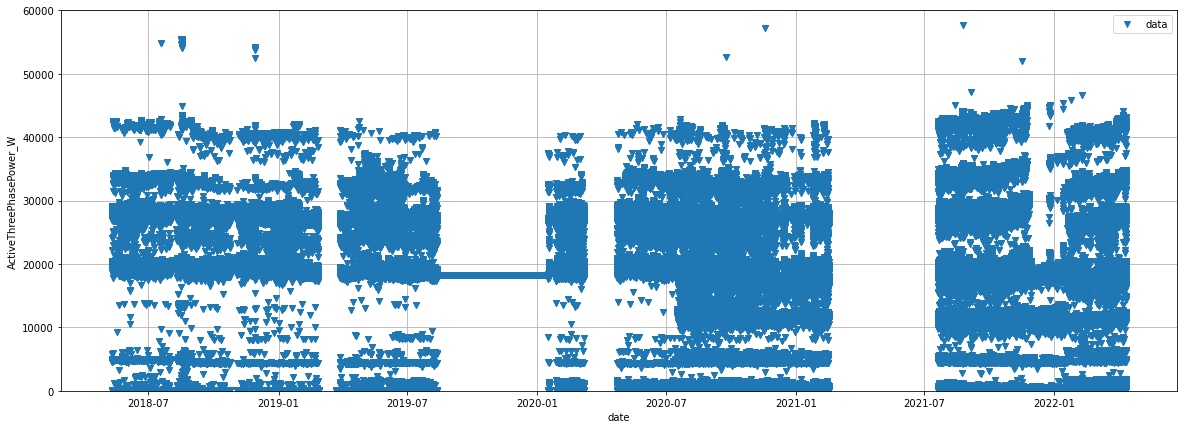

In [57]:
# plot after drop bad row

 
fi = fields[0]
data_now = pd.read_csv(outfile,index_col='timeval',parse_dates=True,date_parser=time_parser)
target = data_now[fi]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
plt.ylim(0,60000)
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fi)
plt.plot(data_now.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()

/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_14929/202357289.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


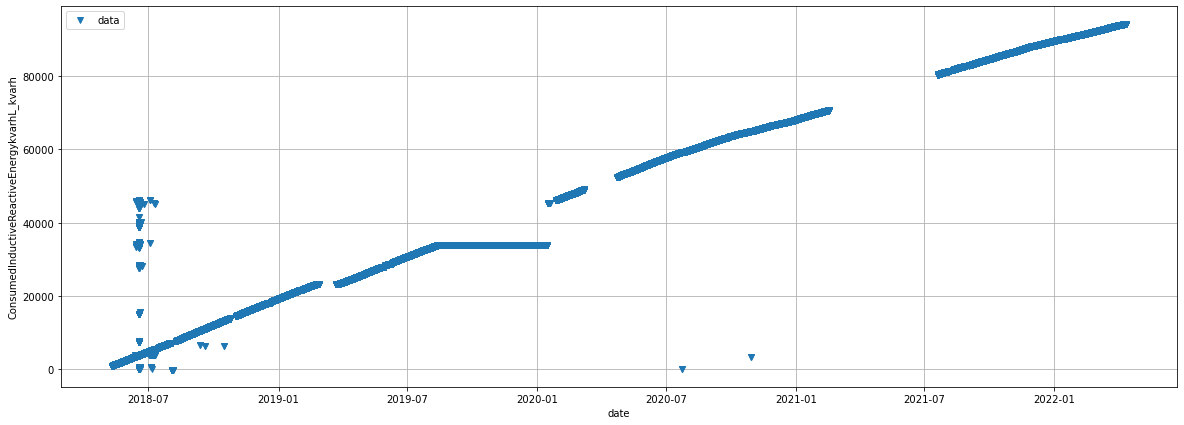

In [58]:
# plot after drop bad row

 
fi = fields[1]
data_now = pd.read_csv(outfile,index_col='timeval',parse_dates=True,date_parser=time_parser)
target = data_now[fi]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
 
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fi)
plt.plot(data_now.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()

# corelation

In [59]:
#check if any columns with zero values
column_names_zero =  data_now.loc[:, (data_now != 0).any(axis=0)].columns.values
len(column_names_zero)

56

In [75]:
corr = data_now.corr().abs()
print(corr)

                                              L1PhaseVoltage_Vx10  \
L1PhaseVoltage_Vx10                                      1.000000   
L1Current_mA                                             0.019796   
L1ActivePower_W                                          0.008047   
L1InductivePower_var                                     0.008162   
L1CapacitivePower_var                                    0.000837   
L1ApparentPower_VA                                       0.008183   
L1PowerFactor_x100                                       0.000027   
CosPhiL1_x100                                            0.000023   
L2PhaseVoltage_Vx10                                      0.076925   
L2Current_mA                                             0.007549   
L2ActivePower_W                                          0.007451   
L2InductivePower_var                                     0.007324   
L2CapacitivePower_var                                    0.000283   
L2ApparentPower_VA                

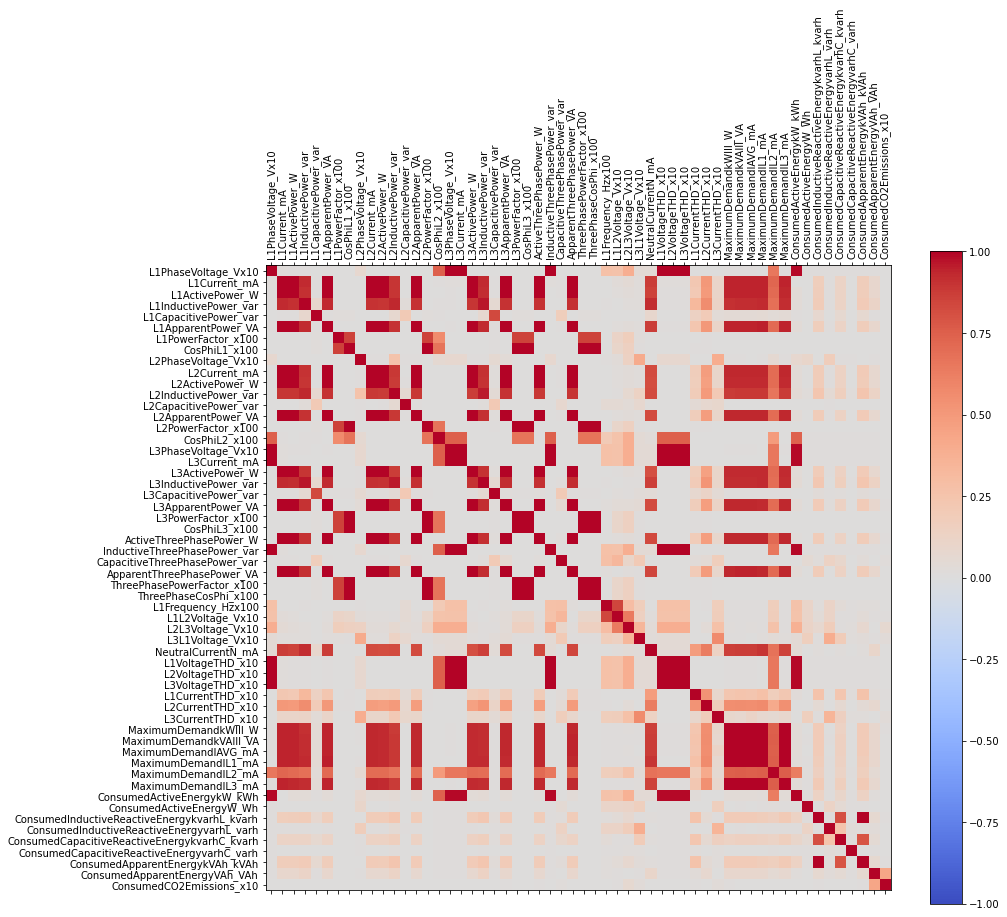

In [76]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_now.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_now.columns)
ax.set_yticklabels(data_now.columns)
plt.show()
outfile_cor= outfile.split('.')[0]+'pearson-fig.png'
plt.savefig(outfile_cor)

In [77]:
#feature selections

 
from sklearn import linear_model
def getTopKCorr(data,k):
    corr = data.corr().abs()
    #del data['Consumed_active_energy_kW']
    
    corr_ener = corr[fi]
    del corr_ener[fi]
    #print corr_ener.values
    #print corr_ener
    idx = (-corr_ener.values).argsort()[:k]
    print (corr_ener[idx])
    return corr_ener[idx].index
    
    

In [78]:


#print top 20 features for consumed energy kW
features = getTopKCorr(data_now,20)
print (features)

ApparentThreePhasePower_VA    0.999049
L2Current_mA                  0.998600
L2ActivePower_W               0.998452
L2ApparentPower_VA            0.998376
L3ActivePower_W               0.997890
L3ApparentPower_VA            0.997864
L1ActivePower_W               0.997784
L1Current_mA                  0.996270
L1ApparentPower_VA            0.996151
MaximumDemandkVAIII_VA        0.932671
MaximumDemandIAVG_mA          0.932648
MaximumDemandkWIII_W          0.932511
MaximumDemandIL3_mA           0.931776
MaximumDemandIL1_mA           0.931240
L3InductivePower_var          0.907522
L1InductivePower_var          0.900622
L2InductivePower_var          0.884585
NeutralCurrentN_mA            0.830345
MaximumDemandIL2_mA           0.709004
L2CurrentTHD_x10              0.474551
Name: ActiveThreePhasePower_W, dtype: float64
Index(['ApparentThreePhasePower_VA', 'L2Current_mA', 'L2ActivePower_W',
       'L2ApparentPower_VA', 'L3ActivePower_W', 'L3ApparentPower_VA',
       'L1ActivePower_W', 'L1Cur

In [79]:
col_name = list(features.values)[:5]

In [80]:
col_name

['ApparentThreePhasePower_VA',
 'L2Current_mA',
 'L2ActivePower_W',
 'L2ApparentPower_VA',
 'L3ActivePower_W']

<Figure size 1440x504 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

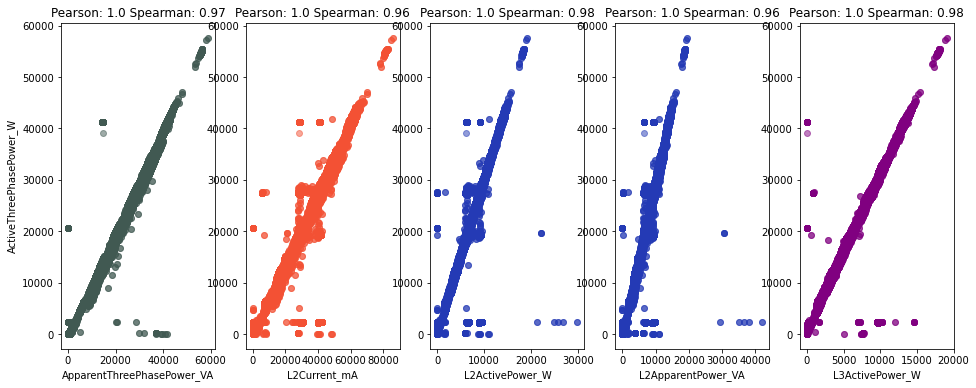

In [82]:
# plot correlated values
 


#fig = plt.figure(figsize=(14,8))
#ax = fig.add_subplot(nrows=1, ncols=5)
fig,ax = plt.subplots(nrows=1, ncols=5)
plt.rcParams['figure.figsize'] = [16, 6]
    
ax=ax.flatten()

#cols = ['Consumed_apparent_energy_kVAh', 'Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']
colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#800080']
j=0

for i in ax:
    if j==0:
        i.set_ylabel(fi)
    i.scatter(data_now[col_name[j]], data_now[fi],  alpha=0.5, color=colors[j])
    i.set_xlabel(col_name[j])
    i.set_title('Pearson: %s'%data_now.corr().loc[col_name[j]][fi].round(2)+' Spearman: %s'%data_now.corr(method='spearman').loc[col_name[j]][fi].round(2))
    j+=1

plt.show()

# data cleansing

In [69]:
#perform data cleaning fill missing value
def resample_to_min(series,field_num):
    resample = series.resample('1T')
    minutes_data = resample.mean()
    print(minutes_data)
    minutes_data.plot()
    pyplot.show()
    return minutes_data

def fill_missing_value(df,method):
   #df = df.dropna()
   df.index = DatetimeIndex(df.index)
   df = df.interpolate(method=method, axis=0).ffill().bfill()
   print (df)
   df.plot()
   pyplot.show()
   return df 

In [70]:
data_now2 = data_now 
 
data_now2= data_now2.resample('2min').mean().interpolate()
#resampled = pd.resample(tmp, '50min', 'ffill')
data_now2.head(10)

,L1PhaseVoltage_Vx10,L1Current_mA,L1ActivePower_W,L1InductivePower_var,L1CapacitivePower_var,L1ApparentPower_VA,L1PowerFactor_x100,CosPhiL1_x100,L2PhaseVoltage_Vx10,L2Current_mA,L2ActivePower_W,L2InductivePower_var,L2CapacitivePower_var,L2ApparentPower_VA,L2PowerFactor_x100,CosPhiL2_x100,L3PhaseVoltage_Vx10,L3Current_mA,L3ActivePower_W,L3InductivePower_var,L3CapacitivePower_var,L3ApparentPower_VA,L3PowerFactor_x100,CosPhiL3_x100,ActiveThreePhasePower_W,InductiveThreePhasePower_var,CapacitiveThreePhasePower_var,ApparentThreePhasePower_VA,ThreePhasePowerFactor_x100,ThreePhaseCosPhi_x100,L1Frequency_Hzx100,L1L2Voltage_Vx10,L2L3Voltage_Vx10,L3L1Voltage_Vx10,NeutralCurrentN_mA,L1VoltageTHD_x10,L2VoltageTHD_x10,L3VoltageTHD_x10,L1CurrentTHD_x10,L2CurrentTHD_x10,L3CurrentTHD_x10,MaximumDemandkWIII_W,MaximumDemandkVAIII_VA,MaximumDemandIAVG_mA,MaximumDemandIL1_mA,MaximumDemandIL2_mA,MaximumDemandIL3_mA,ConsumedActiveEnergykW_kWh,ConsumedActiveEnergyW_Wh,ConsumedInductiveReactiveEnergykvarhL_kvarh,ConsumedInductiveReactiveEnergyvarhL_varh,ConsumedCapacitiveReactiveEnergykvarhC_kvarh,ConsumedCapacitiveReactiveEnergyvarhC_varh,ConsumedApparentEnergykVAh_kVAh,ConsumedApparentEnergyVAh_VAh,ConsumedCO2Emissions_x10
timeval,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-10 04:08:00,2282.0,34240.0,7240.0,2800.0,0.0,7800.0,92.0,93.0,2295.0,28080.0,6080.0,1920.0,0.0,6440.0,94.0,95.0,2293.0,28040.0,5960.0,2200.0,0.0,6400.0,92.0,93.0,19320.0,6960.0,0.0,20640.0,93.0,94.0,5007.0,395.50,397.50,396.80,7840.0,17.0,18.0,17.0,120.0,117.0,128.0,23200.0,24200.0,35400.0,38760.0,33800.0,33680.0,3348.0,842.0,987.0,19.0,4.0,211.0,3514.0,59.0,0.0
2018-05-10 04:10:00,2276.5,33840.0,7120.0,2800.0,0.0,7700.0,92.0,92.5,2293.5,28000.0,6060.0,1880.0,0.0,6400.0,94.0,95.0,2288.5,27980.0,5940.0,2220.0,0.0,6380.0,92.5,93.0,19140.0,6940.0,0.0,20480.0,93.0,93.5,4997.5,394.70,396.70,396.25,7760.0,16.0,14.5,17.0,109.5,130.5,132.0,23120.0,24140.0,35300.0,38880.0,33620.0,33460.0,3349.0,317.5,987.0,190.0,4.0,211.0,3514.0,566.0,0.0
2018-05-10 04:12:00,2280.0,45100.0,9900.0,2520.0,0.0,10260.0,95.5,96.5,2296.5,39720.0,8880.0,1700.0,0.0,9100.0,96.5,98.0,2287.5,39340.0,8680.0,1940.0,0.0,8980.0,95.5,97.0,27500.0,6200.0,0.0,28340.0,96.5,97.0,5005.0,395.15,397.25,396.40,7540.0,17.5,15.5,16.5,78.5,87.0,94.5,23040.0,24080.0,35220.0,39080.0,33400.0,33240.0,3350.0,109.0,987.0,465.0,4.0,211.0,3515.0,406.5,0.0
2018-05-10 04:14:00,2276.5,45640.0,10040.0,2520.0,0.0,10360.0,96.0,96.5,2291.5,39980.0,8960.0,1680.0,0.0,9140.0,97.0,98.0,2289.5,39620.0,8800.0,1900.0,0.0,9040.0,96.5,97.0,27840.0,6140.0,0.0,28540.0,97.0,97.0,5002.0,394.90,396.65,396.15,7540.0,18.5,15.5,16.5,77.0,94.0,95.0,23960.0,24940.0,36460.0,40340.0,34640.0,34460.0,3350.5,364.5,987.0,630.5,4.0,211.0,3515.5,681.5,0.0
2018-05-10 04:16:00,2276.5,45400.0,10000.0,2500.0,0.0,10320.0,96.0,96.5,2294.5,40040.0,8980.0,1720.0,0.0,9160.0,97.0,98.0,2285.5,39520.0,8780.0,1900.0,0.0,9020.0,97.0,97.0,27760.0,6160.0,0.0,28500.0,97.0,97.0,5003.5,394.85,397.05,396.10,7540.0,18.0,15.0,17.0,78.0,86.0,97.0,24860.0,25760.0,37700.0,41540.0,35900.0,35660.0,3351.5,289.0,987.0,837.0,4.0,211.0,3516.5,629.0,0.0
2018-05-10 04:18:00,2276.0,39560.0,8540.0,2640.0,0.0,8980.0,94.0,94.5,2293.5,33960.0,7500.0,1800.0,0.0,7760.0,95.5,96.5,2288.0,33760.0,7360.0,2080.0,0.0,7700.0,94.5,95.0,23440.0,6560.0,0.0,24440.0,95.0,95.0,5000.5,394.80,397.05,396.15,7640.0,17.5,15.0,16.0,96.0,115.0,107.0,24780.0,25700.0,37580.0,41440.0,35780.0,35540.0,3352.0,671.0,987.5,545.5,4.0,211.0,3517.5,538.0,0.0
2018-05-10 04:20:00,2281.0,33880.0,7140.0,2820.0,0.0,7700.0,92.0,92.5,2298.0,28040.0,6080.0,1920.0,0.0,6420.0,94.0,95.0,2294.0,28000.0,5960.0,2260.0,0.0,6400.0,92.0,93.0,19220.0,7000.0,0.0,20520.0,93.0,93.0,5002.5,395.75,397.60,397.00,7800.0,18.5,16.0,16.0,110.5,129.0,134.0,23760.0,24760.0,36200.0,40080.0,34360.0,34180.0,3353.0,341.0,988.0,276.5,4.0,211.0,3518.0,749.0,0.0
2018-05-10 04:22:00,2280.5,33100.0,7040.0,2520.0,0.0,7540.0,92.5,93.5,2297.0,28560.0,6200.0,1920.

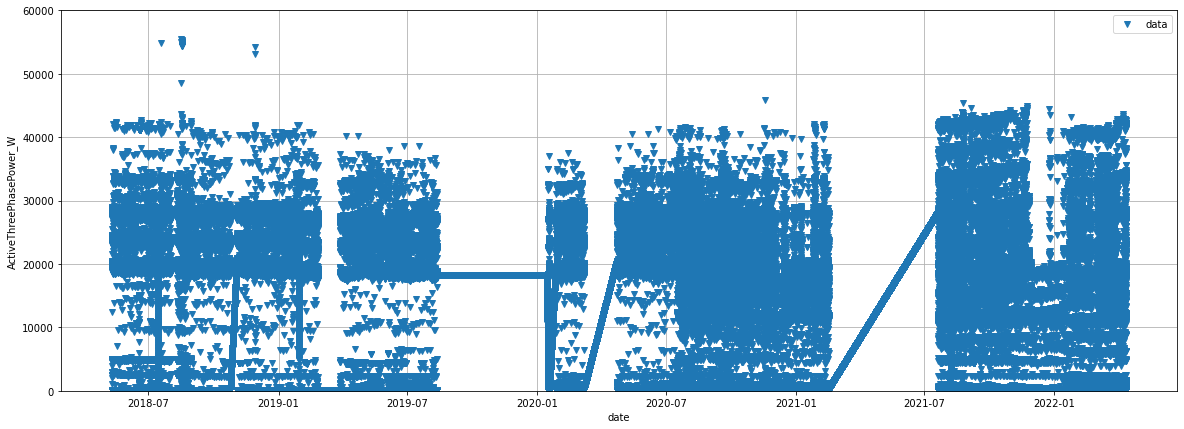

In [71]:
#plot after resampling

fi = fields[0]
 
target = data_now2[fi]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
plt.ylim(0,60000)
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fi)
plt.plot(data_now2.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()


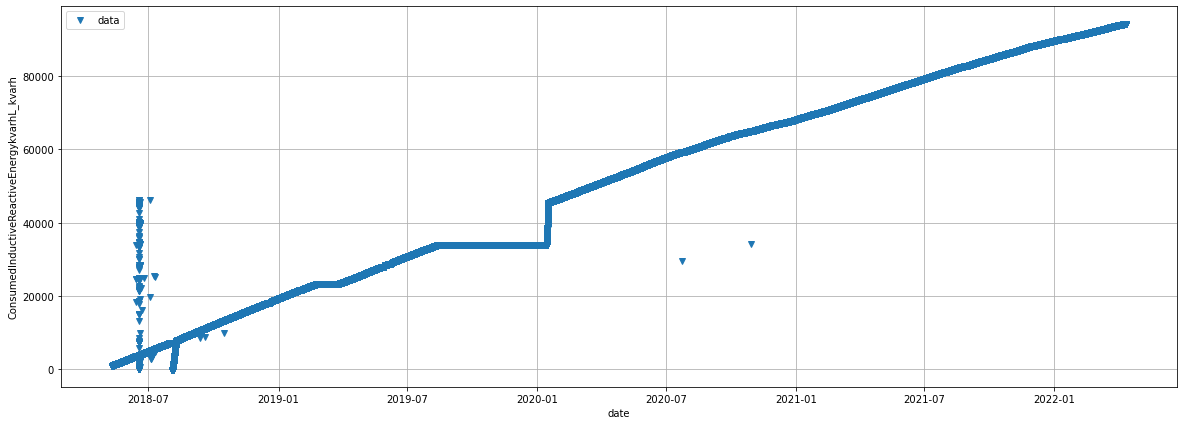

In [73]:
#plot after resampling

fi = fields[1]
 
target = data_now2[fi]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
#plt.ylim(0,60000)
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fi)
plt.plot(data_now2.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()

In [ ]:
data_now2 = data_now.filter(col_name,axis=1)
 
data_now2= data_now2.resample('2min', 'mean').interpolate()
#resampled = pd.resample(tmp, '50min', 'ffill')
data_now2.head()

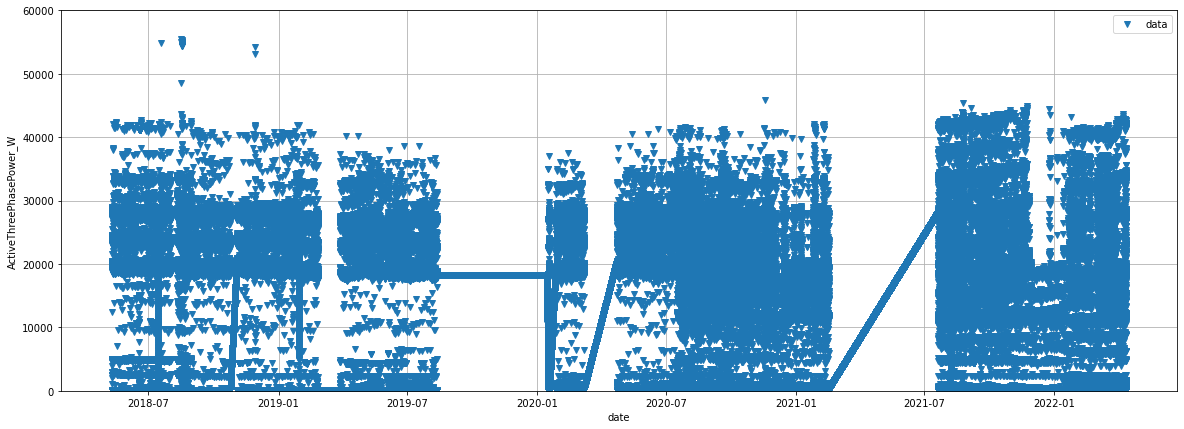

In [74]:
#plot after resampling

fi = fields[0]
 
target = data_now2[fi]
#fig = plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 10})
plt.ylim(0,60000)
plt.grid("on")
plt.xlabel("date")
plt.ylabel(fi)
plt.plot(data_now2.index.values,target.values ,label="data",ls='None',marker='v')
plt.legend()
plt.show()



In [ ]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)
data = pd.read_csv(outfile,index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(14,12))
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
    

In [ ]:
corr = data.corr().abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile= 'pearson-fig.png'
plt.savefig(outfile)

In [ ]:
corr = data.corr(method='spearman')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile=  'spearman-fig.png'
plt.savefig(outfile)


In [ ]:
corr = data.corr(method='kendall')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile= 'kendal-fig.png'
plt.savefig(outfile)

In [ ]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Consumed_apparent_energy_kVAh', 'Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Consumed_active_energy_kW')
    i.scatter(data[cols[j]], data['Consumed_active_energy_kW'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%data.corr().loc[cols[j]]['Consumed_active_energy_kW'].round(2)+' Spearman: %s'%data.corr(method='spearman').loc[cols[j]]['Consumed_active_energy_kW'].round(2))
    j+=1

plt.show()

In [ ]:
#feature selections

from sklearn import linear_model
def getTopKCorr(data,k):
    corr = data.corr().abs()
    #del data['Consumed_active_energy_kW']
    
    corr_ener = corr['Consumed_active_energy_kW']
    del corr_ener['Consumed_active_energy_kW']
    #print corr_ener.values
    #print corr_ener
    idx = (-corr_ener.values).argsort()[:k]
    print corr_ener[idx]
    return corr_ener[idx].index
    
    

In [ ]:
del  data['dev_name']
 
print (data.columns)

#print top 20 features for consumed energy kW
features = getTopKCorr(data,20)
print features

In [ ]:
#select columns with features

data2 = data.iloc[:, [j for j, c in enumerate(data.columns) if c in features ]]


In [ ]:
print data2.head

In [ ]:
target = data['Consumed_active_energy_kW']
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)

In [ ]:
fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict.png')

In [ ]:
#with no max limit check

import sys
import os
import csv

csv_file = 'power_test.csv'
key_name  = 'ADB1_CRAC3'
i = 0
j = 0
 
 
outfile ='powertest_CRAC3_nofilter.out.csv'
with open(csv_file) as csv_file, open(outfile,'w') as out_csv:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_writer = csv.writer(out_csv,delimiter=',')
        
        for row in csv_reader:
           if i == 0:
               csv_writer.writerow(row)
               i += 1   # skip the first header row
               header_row = row
               for y in field_num:
                   print ('check field %s\n'%row[y])
               continue
           i =  i + 1
           found = False
           
           for column in row:
               #print(column)
               if column==key_name:
                   found = True;
                   j = j +1
                   break

           if found:
                csv_writer.writerow(row)  
                
                 
                
        print('Processed %d  lines found %d line '%(i,j))
       

In [ ]:
data = pd.read_csv('powertest_CRAC3_nofilter.out.csv',index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(14,12))
plt.ylim(0,25000)
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
    
 

In [ ]:
 
del data['Consumed_active_energy_kW']
data2 = data.iloc[:, [j for j, c in enumerate(data.columns) if c in features ]]
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)
fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.ylim(0,25000)
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict_no.png')